In [83]:
import pandas as pd
import statsmodels.api as sm
# Create a sample dataframe
df = pd.read_csv('Clean_Data_17-04.csv')


In [84]:
df

Date    Price             Status  Build Year  \
0       2018-10-29  1845000  Solgt, Fri handel        1933   
1       2017-07-06  1400000  Solgt, Fri handel        1933   
2       2019-06-25  3225000  Solgt, Fri handel        2006   
3       2023-05-02  2600000  Solgt, Fri handel        1935   
4       2016-08-21  2995000  Solgt, Fri handel        1914   
...            ...      ...                ...         ...   
114881  2021-01-09  4330000  Solgt, Fri handel        1985   
114882  2015-08-09  3900000  Solgt, Fri handel        1991   
114883  2021-06-18  3575000  Solgt, Fri handel        1985   
114884  2016-09-19  3145000  Solgt, Fri handel        1986   
114885  2017-06-19  4350000  Solgt, Fri handel        1996   

                                                      URL  \
0       https://www.boligsiden.dk/adresse/elmelundevej...   
1       https://www.boligsiden.dk/adresse/elmelundevej...   
2       https://www.boligsiden.dk/adresse/weidekampsga...   
3       https://www.boligsiden.dk/adresse/vestbanevej-...   
4       https://www.boligsiden.dk/adresse/lemnosvej-22...   
...                                                   ...   
114881  https://www.boligsiden.dk/adresse/bysvinget-5-...   
114882  https://www.boligsiden.dk/adresse/gartnerbakke...   
114883  https://www.boligsiden.dk/adresse/bysvinget-9-...   
114884  https://www.boligsiden.dk/adresse/bysvinget-6-...   
114885  https://www.boligsiden.dk/adresse/gartnerbakke...   

                                          Adresse           Kort adresse  \
0           Elmelundevej 22, 1. th. 2700 Brønshøj        Elmelundevej 22   
1           Elmelundevej 22, 1. th. 2700 Brønshøj        Elmelundevej 22   
2       Weidekampsgade 57, 5. 3. 2300 København S      Weidekampsgade 57   
3               Vestbanevej 15, 4. th. 2500 Valby         Vestbanevej 15   
4          Lemnosvej 22, st. tv. 2300 København S           Lemnosvej 22   
...                                           ...                    ...   
114881                Bysvinget 5 2625 Vallensbæk       Bysvinget 5 2625   
114882           Gartnerbakken 11 2625 Vallensbæk  Gartnerbakken 11 2625   
114883                Bysvinget 9 2625 Vallensbæk       Bysvinget 9 2625   
114884                Bysvinget 6 2625 Vallensbæk       Bysvinget 6 2625   
114885           Gartnerbakken 13 2625 Vallensbæk  Gartnerbakken 13 2625   

         Kvdm   Latitude  Longitude     Kommune           Type  \
0        60.0  55.702660  12.496368   København  Ejerlejlighed   
1        60.0  55.702660  12.496368   København  Ejerlejlighed   
2        67.0  55.667245  12.581967   København  Ejerlejlighed   
3        65.0  55.664748  12.521148   København  Ejerlejlighed   
4        85.0  55.652880  12.622464   København  Ejerlejlighed   
...       ...        ...        ...         ...            ...   
114881  119.0  55.637184  12.360875  Vallensbak          Villa   
114882  190.0  55.635556  12.365605  Vallensbak          Villa   
114883  127.0  55.637423  12.360153  Vallensbak          Villa   
114884  127.0  55.637295  12.361516  Vallensbak          Villa   
114885  189.0  55.635785  12.365517  Vallensbak          Villa   

        Nearest_Metro_Distance  Nearest_Tog_Distance  Distance_to_rådhus  \
0                     1.589281              1.740477            5.436778   
1                     1.589281              1.740477            5.436778   
2                     0.459682              1.303566            1.266103   
3                     1.329182              0.429430            3.258313   
4                     0.693030              4.176782            4.221506   
...                        ...                   ...                 ...   
114881                9.643908              2.322619           13.757968   
114882                9.530439              1.981665           13.535917   
114883                9.662861              2.336402           13.792638   
114884                9.604801              2.301127           13.7159

In [85]:
pd.set_option('display.max_columns', None)
# df

In [86]:
import statsmodels.api as sm

# Select all columns except 'Date'
X = sm.add_constant(df.drop(columns=['Date', 'Price', 'Status', 'Build Year', 'URL', 'Adresse', 'Kort adresse', 'Kvdm', 'Latitude', 'Longitude', 
                                     'Kommune', 'Type', 'Price_per_kvdm', 'Price_million', 'Year', 'Natural_log_Price', 'Natural_log_Price_per_kvdm'
                                    ,'Toiletter', 'Nearest_Metro_Distance', 'Nearest_Tog_Distance']))

# Fit OLS model
model = sm.OLS(df['Natural_log_Price_per_kvdm'], X)
results = model.fit()

# Print the regression summary
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Natural_log_Price_per_kvdm   R-squared:                       0.515
Model:                                    OLS   Adj. R-squared:                  0.515
Method:                         Least Squares   F-statistic:                     2979.
Date:                        Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                                15:09:04   Log-Likelihood:                -12626.
No. Observations:                      114886   AIC:                         2.534e+04
Df Residuals:                          114844   BIC:                         2.574e+04
Df Model:                                  41                                         
Covariance Type:                    nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.5476      0.006   1825.685      0.000      10.536      10.559
Distance_to_rådhus       -0.0359      0.001    -62.658      0.000      -0.037      -0.035
After corona lockdown     0.0554      0.006      9.161      0.000       0.044       0.067
Etager                   -0.0288      0.004     -6.784      0.000      -0.037      -0.020
Værelser                  0.0071      0.001      9.176      0.000       0.006       0.009
Badeværelser             -0.0241      0.002    -10.848      0.000      -0.028      -0.020
KælderAreal               0.0013   2.73e-05     48.028      0.000       0.001       0.001
Albertslund              -0.4137      0.010    -42.510      0.000      -0.433      -0.395
Ballerup                 -0.2450      0.008    -30.306      0.000      -0.261      -0.229
Brøndby                  -0.3996      0.009    -43.826      0.000      -0.417      -0.382
Frederiksberg             0.0664      0.003     20.396      0.000       0.060       0.073
Furesø                   -0.0019      0.009     -0.211      0.833      -0.020       0.016
Gentofte                  0.1552      0.006     26.406      0.000       0.144       0.167
Gladsaxe                 -0.1368      0.007    -20.637      0.000      -0.150      -0.124
Glostrup                 -0.3090      0.008    -37.030      0.000      -0.325      -0.293
Greve                    -0.0891      0.010     -9.028      0.000      -0.108      -0.070
Herlev                   -0.2806      0.009    -30.753      0.000      -0.298      -0.263
Hvidovre                 -0.3228      0.007    -46.955      0.000      -0.336      -0.309
Ishøj                    -0.2656      0.010    -27.572      0.000      -0.285      -0.247
Lyngby-Taarbak            0.0940      0.008     12.134      0.000       0.079       0.109
Rudersdal                 0.1638      0.008     19.328      0.000       0.147       0.180
Rødovre                  -0.2193      0.006    -38.469      0.000      -0.230      -0.208
Tarnby                   -0.2258      0.006    -37.883      0.000      -0.237      -0.214
Vallensbak               -0.3478      0.009    -38.474      0.000      -0.366      -0.330
Rækkehus                  0.1724      0.004     44.190      0.000       0.165       0.180
Villa                     0.0879      0.003     25.602      0.000       0.081       0.095
2016                      0.0936      0.003     30.115      0.000       0.087       0.100
2017                      0.1655      0.003     53.282      0.000       0.159       0.172
2018                      0.2116      0.003     65.260      0.000       0.205       0.218
2019                      0.2273      0.003     69.468      0.000       0.221       0.234
2020                     

## Residuals

In [87]:
# Fit OLS model
model = sm.OLS(df['Natural_log_Price_per_kvdm'], X)
results = model.fit()

# Get residuals
residuals = results.resid

# Print the first few residuals
# print(residuals.head())

## Pooled OLS

In [88]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'df' is your pre-loaded DataFrame with the correct columns

# Select the columns that will be used as independent variables
# Make sure to include the 'After corona lockdown' dummy variable
X = sm.add_constant(df.drop(columns=['Date', 'Price', 'Status', 'Build Year', 'URL', 'Adresse', 'Kort adresse', 'Kvdm', 'Latitude', 'Longitude', 
                                     'Kommune', 'Type', 'Price_per_kvdm', 'Price_million', 'Year', 'Natural_log_Price', 'Natural_log_Price_per_kvdm'
                                    ,'Toiletter', 'Nearest_Metro_Distance', 'Nearest_Tog_Distance']))

########################################################################################

# denne video er god til at forstå pooled OLS
# https://www.youtube.com/watch?v=CwcNyXDvznE&ab_channel=BenLambert


# List of municipalities and property types
municipalities = [
    'Albertslund', 'Ballerup', 'Brøndby', 'Frederiksberg', 'Furesø',
    'Gentofte', 'Gladsaxe', 'Glostrup', 'Greve', 'Herlev',
    'Hvidovre', 'Ishøj', 'Lyngby-Taarbak', 'Rudersdal', 'Rødovre',
    'Tarnby', 'Vallensbak'
]

# Add interaction terms for each municipality with the 'After corona lockdown' dummy
for mun in municipalities:
    X[f'{mun}_ld_int'] = df[mun] * df['After corona lockdown']
#########################################################################################

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Natural_log_Price_per_kvdm']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Natural_log_Price_per_kvdm   R-squared:                       0.517
Model:                                    OLS   Adj. R-squared:                  0.516
Method:                         Least Squares   F-statistic:                     2115.
Date:                        Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                                15:09:04   Log-Likelihood:                -12488.
No. Observations:                      114886   AIC:                         2.509e+04
Df Residuals:                          114827   BIC:                         2.566e+04
Df Model:                                  58                                         
Covariance Type:                    nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.5476      0.006   1814.561      0.000      10.536      10.559
Distance_to_rådhus       -0.0359      0.001    -62.785      0.000      -0.037      -0.035
After corona lockdown     0.0580      0.006      9.118      0.000       0.046       0.071
Etager                   -0.0292      0.004     -6.876      0.000      -0.038      -0.021
Værelser                  0.0071      0.001      9.175      0.000       0.006       0.009
Badeværelser             -0.0241      0.002    -10.875      0.000      -0.028      -0.020
KælderAreal               0.0013   2.73e-05     48.016      0.000       0.001       0.001
Albertslund              -0.3915      0.011    -35.167      0.000      -0.413      -0.370
Ballerup                 -0.2306      0.009    -25.895      0.000      -0.248      -0.213
Brøndby                  -0.3933      0.010    -37.492      0.000      -0.414      -0.373
Frederiksberg             0.0610      0.004     15.082      0.000       0.053       0.069
Furesø                    0.0144      0.010      1.440      0.150      -0.005       0.034
Gentofte                  0.1583      0.006     24.904      0.000       0.146       0.171
Gladsaxe                 -0.1336      0.007    -18.586      0.000      -0.148      -0.120
Glostrup                 -0.3150      0.010    -32.723      0.000      -0.334      -0.296
Greve                    -0.0809      0.010     -7.850      0.000      -0.101      -0.061
Herlev                   -0.2713      0.011    -25.472      0.000      -0.292      -0.250
Hvidovre                 -0.3395      0.008    -44.701      0.000      -0.354      -0.325
Ishøj                    -0.2101      0.011    -19.565      0.000      -0.231      -0.189
Lyngby-Taarbak            0.0900      0.008     10.691      0.000       0.074       0.107
Rudersdal                 0.1504      0.009     16.852      0.000       0.133       0.168
Rødovre                  -0.2283      0.007    -33.729      0.000      -0.242      -0.215
Tarnby                   -0.2244      0.007    -32.315      0.000      -0.238      -0.211
Vallensbak               -0.3493      0.010    -34.389      0.000      -0.369      -0.329
Rækkehus                  0.1732      0.004     44.441      0.000       0.166       0.181
Villa                     0.0881      0.003     25.704      0.000       0.081       0.095
2016                      0.0930      0.003     29.953      0.000       0.087       0.099
2017                      0.1652      0.003     53.216      0.000       0.159       0.171
2018                      0.2111      0.003     65.146      0.000       0.205       0.217
2019                      0.2270      0.003     69.425      0.000       0.221       0.233
2020                     

In [89]:
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg


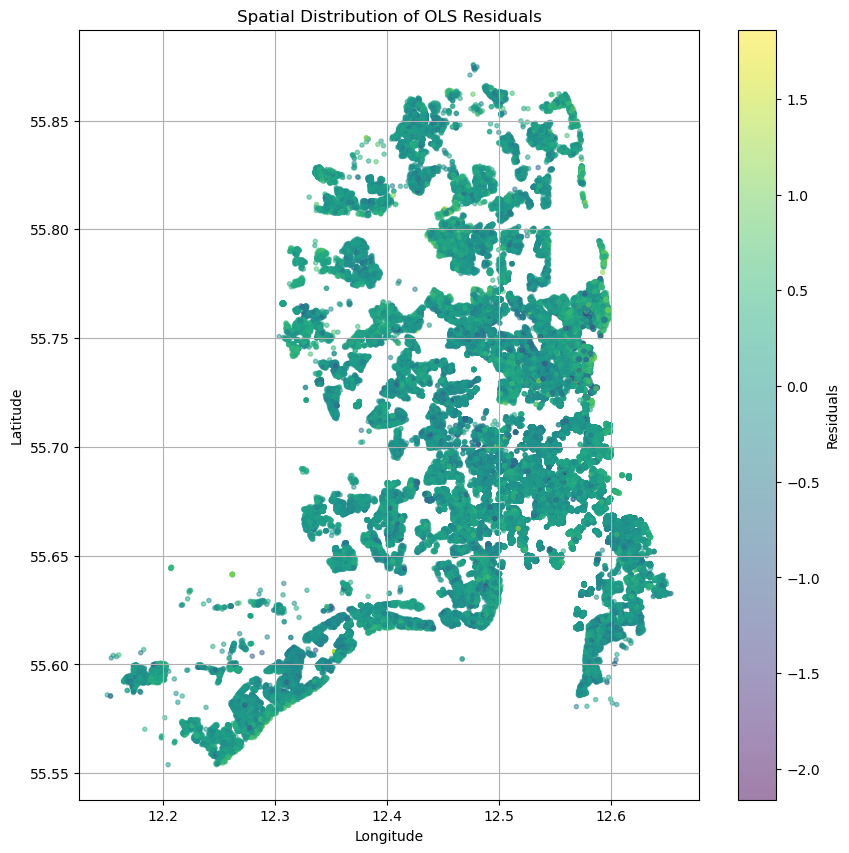

In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and model is your fitted OLS model from statsmodels
df['residuals'] = model.resid

# Plot setup
plt.figure(figsize=(10, 10))
plt.scatter(df['Longitude'], df['Latitude'], c=df['residuals'], cmap='viridis', alpha=0.5, marker='.')
plt.colorbar(label='Residuals')
plt.title('Spatial Distribution of OLS Residuals')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Binning the data
num_cells_lon = 120
num_cells_lat = 120
lon_bins = np.linspace(df['Longitude'].min(), df['Longitude'].max(), num_cells_lon + 1)
lat_bins = np.linspace(df['Latitude'].min(), df['Latitude'].max(), num_cells_lat + 1)
df['lon_bin'] = np.digitize(df['Longitude'], lon_bins) - 1
df['lat_bin'] = np.digitize(df['Latitude'], lat_bins) - 1
df['lon_bin'] = df['lon_bin'].clip(0, num_cells_lon - 1)
df['lat_bin'] = df['lat_bin'].clip(0, num_cells_lat - 1)

# Aggregating residuals
aggregated_residuals = df.groupby(['lon_bin', 'lat_bin'])['residuals'].mean().reset_index()

# Assuming you set up the NW analysis to use these aggregated residuals
# This part will depend on your specific requirements and setup for the NW analysis


In [91]:
# Calculate the center longitude and latitude for each grid cell
df['lon_center'] = (lon_bins[df['lon_bin']] + lon_bins[df['lon_bin'] + 1]) / 2
df['lat_center'] = (lat_bins[df['lat_bin']] + lat_bins[df['lat_bin'] + 1]) / 2

# Aggregate residuals for each grid cell
aggregated_residuals = df.groupby(['lon_bin', 'lat_bin']).agg({
    'residuals': 'mean',
    'lon_center': 'first',  # No need to average centers as they are constant for the bin
    'lat_center': 'first'
}).reset_index()

# Now use the aggregated_residuals with lon_center and lat_center in the NW regression


In [92]:
aggregated_residuals

lon_bin  lat_bin  residuals  lon_center  lat_center
0           0       11  -0.436278   12.152769   55.584749
1           0       18  -0.394553   12.152769   55.603517
2           1       18  -0.015121   12.156956   55.603517
3           2       18   0.577720   12.161143   55.603517
4           3       14   0.135052   12.165329   55.592793
...       ...      ...        ...         ...         ...
3664      118       30  -0.044936   12.646797   55.635690
3665      118       31   0.014425   12.646797   55.638372
3666      118       32   0.031460   12.646797   55.641053
3667      119       29  -0.174438   12.650984   55.633009
3668      119       30   0.048944   12.650984   55.635690

[3669 rows x 5 columns]

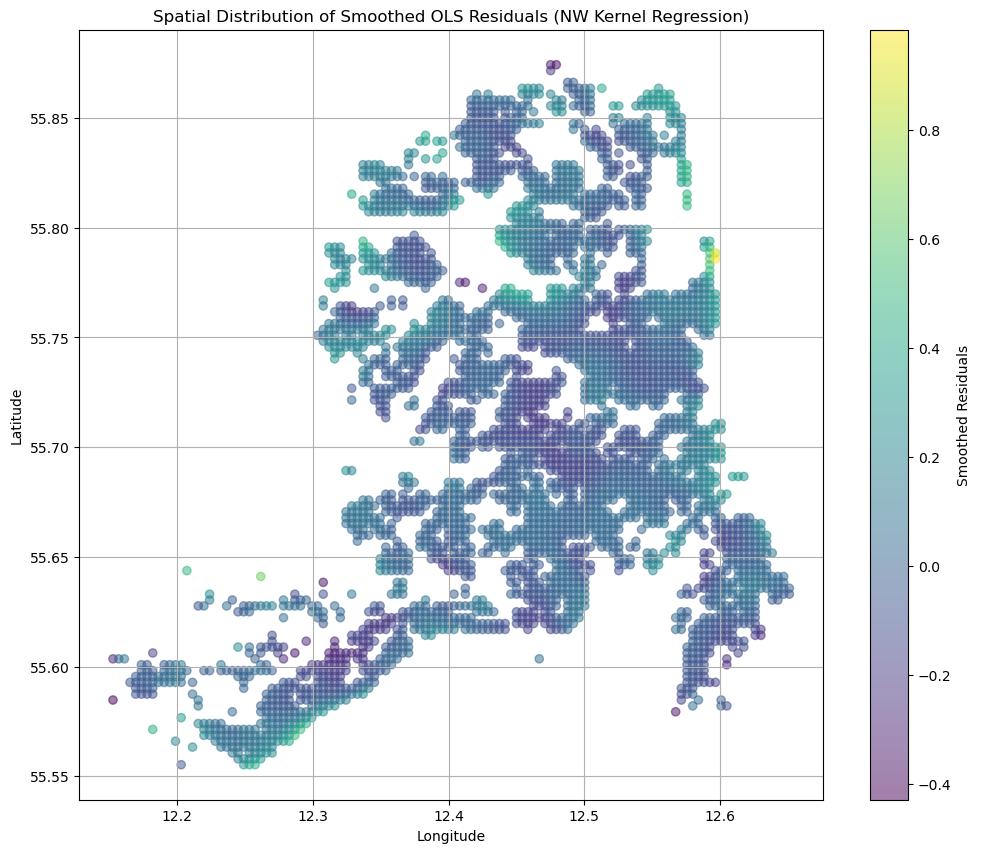

In [93]:
# Ensure statsmodels is updated to the latest version to avoid any compatibility issues.
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg

# Prepare the data for the NW analysis, which includes only the non-empty grid cells
X_nw = aggregated_residuals[['lon_center', 'lat_center']]
y_nw = aggregated_residuals['residuals']

# Note that KernelReg expects a 2D array for independent variables (exog)
X_nw = X_nw.values
y_nw = y_nw.values

# Fit the Nadaraya-Watson kernel regression model
# 'll' indicates two continuous variables (longitude and latitude)
# The bandwidth can be specified manually or selected using cross-validation methods
# Here we choose 'cv_ls' for least squares cross-validation
nw_model = KernelReg(endog=y_nw, exog=X_nw, var_type='cc', bw='cv_ls')
nw_fit = nw_model.fit(X_nw)

# Extract the fitted values, which are the smoothed residuals
smoothed_residuals = nw_fit[0]

# Add the smoothed residuals back to the aggregated_residuals DataFrame
aggregated_residuals['smoothed_residuals'] = smoothed_residuals

# Visualizing the smoothed residuals over space
plt.figure(figsize=(12, 10))
sc = plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
                 c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='Smoothed Residuals')
plt.title('Spatial Distribution of Smoothed OLS Residuals (NW Kernel Regression)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [94]:
# Create a fine grid for interpolation
num_fine = 300
fine_grid_x, fine_grid_y = np.mgrid[
    aggregated_residuals['lon_center'].min():aggregated_residuals['lon_center'].max():complex(0, num_fine),
    aggregated_residuals['lat_center'].min():aggregated_residuals['lat_center'].max():complex(0, num_fine)
]
fine_grid_points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T

# Predict on the fine grid (may take some time)
nw_fitted_values_fine = nw_model.fit(fine_grid_points)[0]


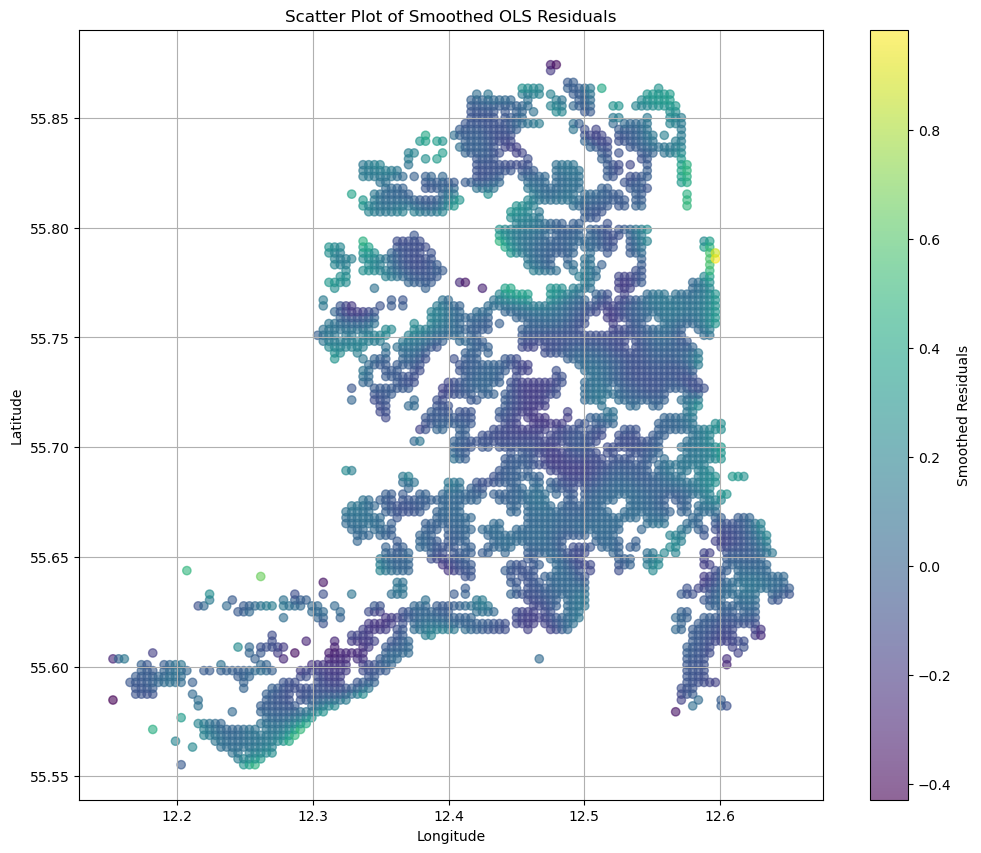

In [95]:
import matplotlib.pyplot as plt

# Plot the smoothed residuals over the original data points
plt.figure(figsize=(12, 10))
plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
            c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Smoothed Residuals')
plt.title('Scatter Plot of Smoothed OLS Residuals')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


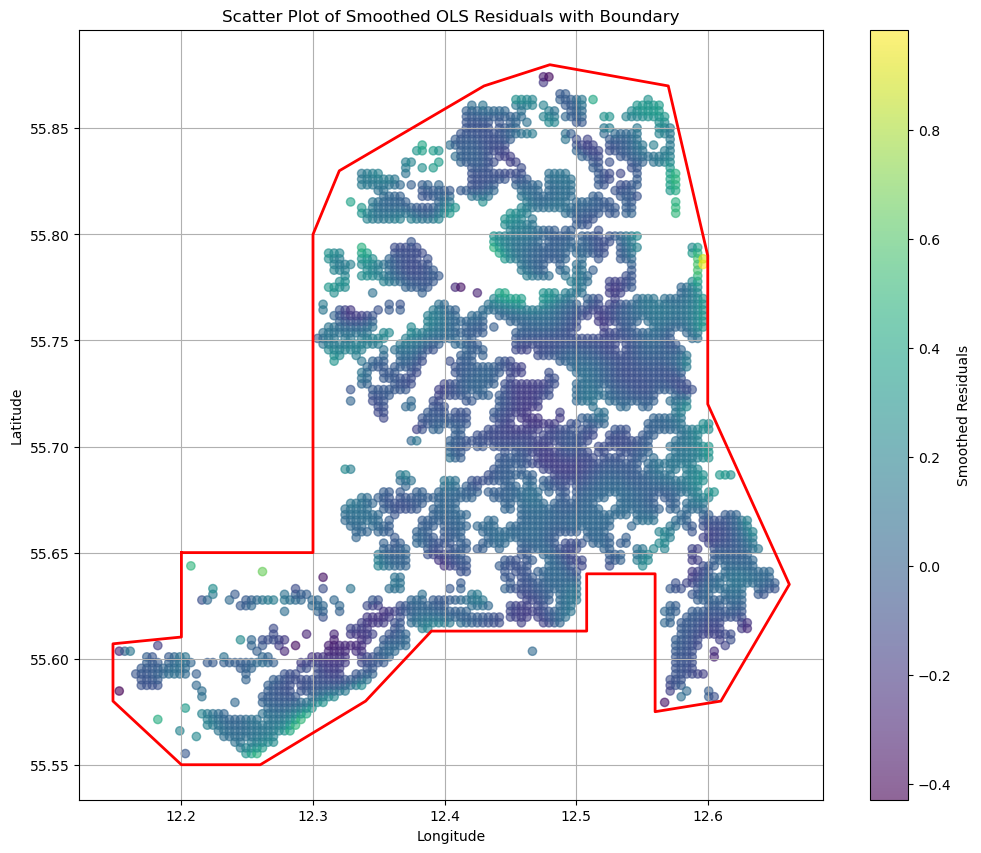

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Given 'aggregated_residuals' and the plot you've already generated with it:

# Plot the smoothed residuals over the original data points
plt.figure(figsize=(12, 10))
plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
            c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.6)

# Plot the boundary
boundary_coords = np.array([
    [12.2, 55.65],
    [12.3, 55.65],
    [12.3, 55.8],
    [12.32, 55.83],
    [12.43, 55.87],
    [12.48, 55.88],
    [12.57, 55.87],
    [12.6, 55.79],
    [12.6, 55.72],
    [12.662, 55.635],
    [12.61, 55.58],
    [12.56, 55.575],
    [12.56, 55.64],
    [12.508, 55.64],
    [12.508, 55.613],
    [12.39, 55.613],
    [12.34, 55.58],
    [12.26, 55.55],
    [12.2, 55.55],
    [12.148, 55.58],
    [12.148, 55.607],
    [12.2, 55.6102],
    [12.2, 55.65]
])

# Add the boundary to the plot. Close the loop by repeating the first point at the end.
boundary_loop = np.vstack([boundary_coords, boundary_coords[0]])
plt.plot(boundary_loop[:, 0], boundary_loop[:, 1], c='red', linewidth=2)

plt.colorbar(label='Smoothed Residuals')
plt.title('Scatter Plot of Smoothed OLS Residuals with Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


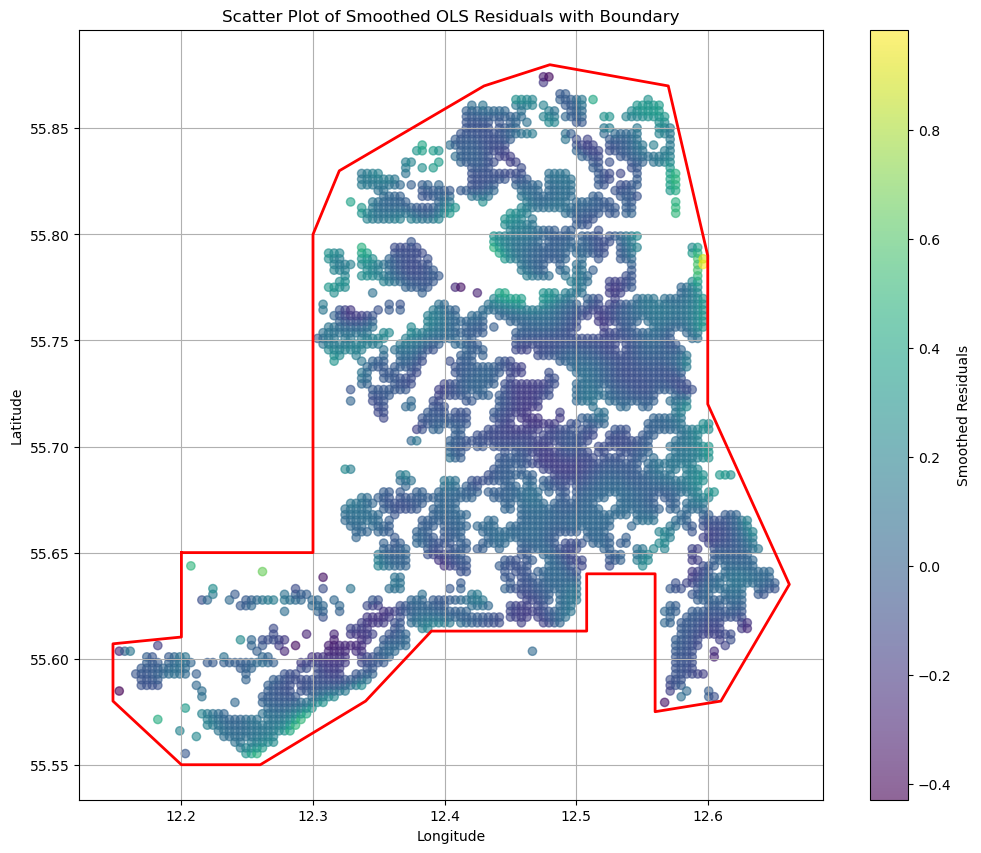

In [97]:
import matplotlib.path as mpath
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'aggregated_residuals' and 'boundary_coords' are defined as shown above

# Create a matplotlib path object from the boundary coordinates
boundary_path = mpath.Path(boundary_coords)

# Create a fine grid for interpolation
num_fine = 300  # Adjust as needed for the density of your data and desired resolution
fine_grid_x, fine_grid_y = np.mgrid[
    aggregated_residuals['lon_center'].min():aggregated_residuals['lon_center'].max():complex(0, num_fine),
    aggregated_residuals['lat_center'].min():aggregated_residuals['lat_center'].max():complex(0, num_fine)
]
fine_grid_points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T

# Use the path object to check which grid points are within the boundary
inside_mask = boundary_path.contains_points(fine_grid_points)

# Reshape the mask to match the grid
inside_mask = inside_mask.reshape(fine_grid_x.shape)

# Mask the grid so that only points inside the boundary are True
# When performing the interpolation, we will only interpolate points where inside_mask is True

# Plotting the boundary over the scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
            c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.6)
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], c='red', linewidth=2)  # Plot the boundary

# Now you can proceed to interpolate only within this mask.
# If using griddata as previously shown, you would apply the mask after the interpolation is done.

# Your code for interpolation goes here, then apply the inside_mask to the result
# interpolated_data[~inside_mask] = np.nan

plt.colorbar(label='Smoothed Residuals')
plt.title('Scatter Plot of Smoothed OLS Residuals with Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


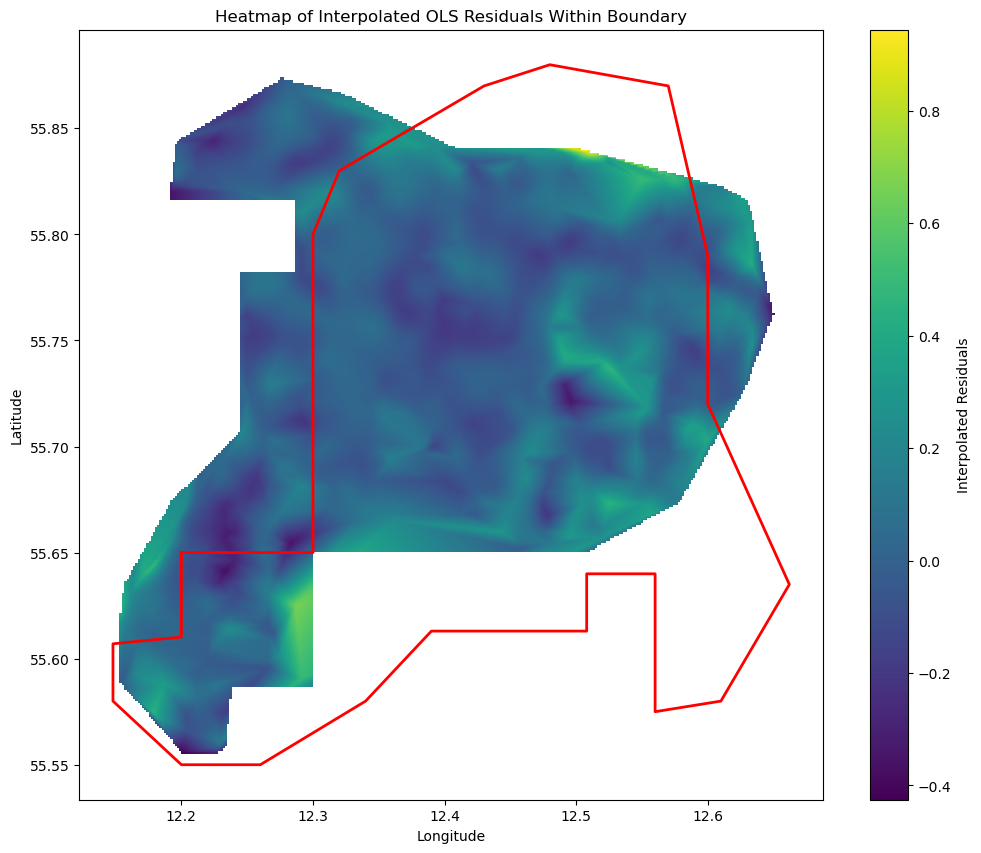

In [126]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath

# Define the boundary coordinates as np.array for the region of interest
boundary_coords = np.array([
    [12.2, 55.65],
    [12.3, 55.65],
    [12.3, 55.8],
    [12.32, 55.83],
    [12.43, 55.87],
    [12.48, 55.88],
    [12.57, 55.87],
    [12.6, 55.79],
    [12.6, 55.72],
    [12.662, 55.635],
    [12.61, 55.58],
    [12.56, 55.575],
    [12.56, 55.64],
    [12.508, 55.64],
    [12.508, 55.613],
    [12.39, 55.613],
    [12.34, 55.58],
    [12.26, 55.55],
    [12.2, 55.55],
    [12.148, 55.58],
    [12.148, 55.607],
    [12.2, 55.6102],
    [12.2, 55.65]
]) # Your coordinates here

# Prepare your data points and values for interpolation
lon = aggregated_residuals['lon_center'].values
lat = aggregated_residuals['lat_center'].values
residuals = aggregated_residuals['smoothed_residuals'].values

# Create the fine grid for interpolation
num_fine = 300
fine_grid_x, fine_grid_y = np.mgrid[
    lon.min():lon.max():complex(0, num_fine),
    lat.min():lat.max():complex(0, num_fine)
]

# Create the mask using matplotlib's Path
path = mpath.Path(boundary_coords)
points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T
mask = path.contains_points(points)
mask = mask.reshape(fine_grid_x.shape)

# Perform the interpolation
interpolated_values = griddata(
    (lon, lat),
    residuals,
    (fine_grid_x, fine_grid_y),
    method='linear'  # You can also try 'cubic' for smoother results
)

# Apply the mask to the interpolated values
interpolated_values[~mask] = np.nan  # Set points outside the boundary to NaN

# Now plot the results
plt.figure(figsize=(12, 10))
plt.imshow(interpolated_values, origin='lower', aspect='auto', 
           extent=(lon.min(), lon.max(), lat.min(), lat.max()),
           cmap='viridis')
plt.colorbar(label='Interpolated Residuals')
plt.title('Heatmap of Interpolated OLS Residuals Within Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Overlay the boundary
boundary_loop = np.vstack([boundary_coords, boundary_coords[0]])
plt.plot(boundary_loop[:, 0], boundary_loop[:, 1], color='red', linewidth=2)

plt.show()


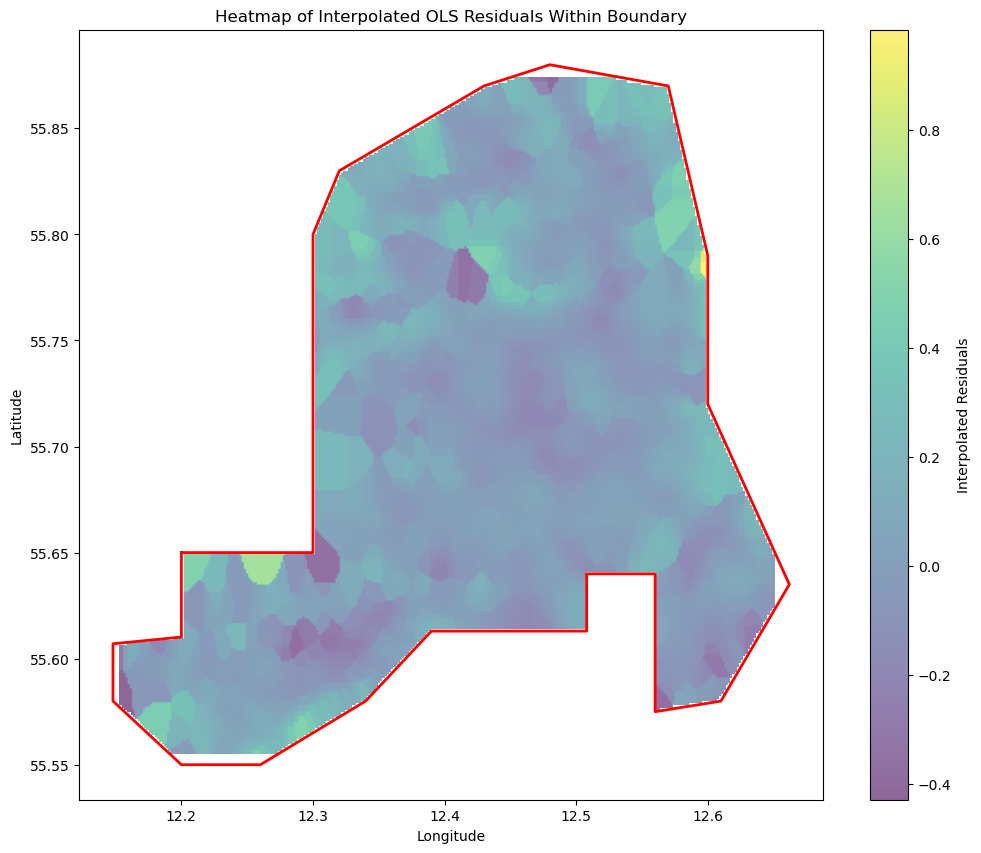

In [131]:
# Perform 'nearest' interpolation
interpolated_nearest = griddata(
    (lon, lat),
    residuals,
    (fine_grid_x, fine_grid_y),
    method='nearest'
)

# Mask out the areas outside the boundary
interpolated_nearest[~inside_mask] = np.nan

# Rotate the interpolated data 90 degrees counterclockwise.
interpolated_nearest_rotated = np.rot90(interpolated_nearest, k=3)  # k=3 rotates 270 degrees counterclockwise
interpolated_nearest_flipped = np.fliplr(interpolated_nearest_rotated)
# Now plot the results with the corrected orientation
plt.figure(figsize=(12, 10))
plt.imshow(interpolated_nearest_flipped, origin='lower', aspect='auto', 
           extent=(lon.min(), lon.max(), lat.min(), lat.max()),
           cmap='viridis', alpha=0.6)
plt.colorbar(label='Interpolated Residuals')
plt.title('Heatmap of Interpolated OLS Residuals Within Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Overlay the boundary with the correct coordinates
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)

plt.show()



In [107]:
boundary_coords = np.array([
    [12.2, 55.65],
    [12.3, 55.65],
    [12.3, 55.8],
    [12.32, 55.83],
    [12.43, 55.87],
    [12.48, 55.88],
    [12.57, 55.87],
    [12.6, 55.79],
    [12.6, 55.72],
    [12.662, 55.635],
    [12.61, 55.58],
    [12.56, 55.575],
    [12.56, 55.64],
    [12.508, 55.64],
    [12.508, 55.613],
    [12.39, 55.613],
    [12.34, 55.58],
    [12.26, 55.55],
    [12.2, 55.55],
    [12.148, 55.58],
    [12.148, 55.607],
    [12.2, 55.6102],
    [12.2, 55.65]
])


print(boundary_coords)
print("Shape of boundary_coords:", boundary_coords.shape)



[[12.2    55.65  ]
 [12.3    55.65  ]
 [12.3    55.8   ]
 [12.32   55.83  ]
 [12.43   55.87  ]
 [12.48   55.88  ]
 [12.57   55.87  ]
 [12.6    55.79  ]
 [12.6    55.72  ]
 [12.662  55.635 ]
 [12.61   55.58  ]
 [12.56   55.575 ]
 [12.56   55.64  ]
 [12.508  55.64  ]
 [12.508  55.613 ]
 [12.39   55.613 ]
 [12.34   55.58  ]
 [12.26   55.55  ]
 [12.2    55.55  ]
 [12.148  55.58  ]
 [12.148  55.607 ]
 [12.2    55.6102]
 [12.2    55.65  ]]
Shape of boundary_coords: (23, 2)


(300, 300)
(300, 300)
(300, 300)


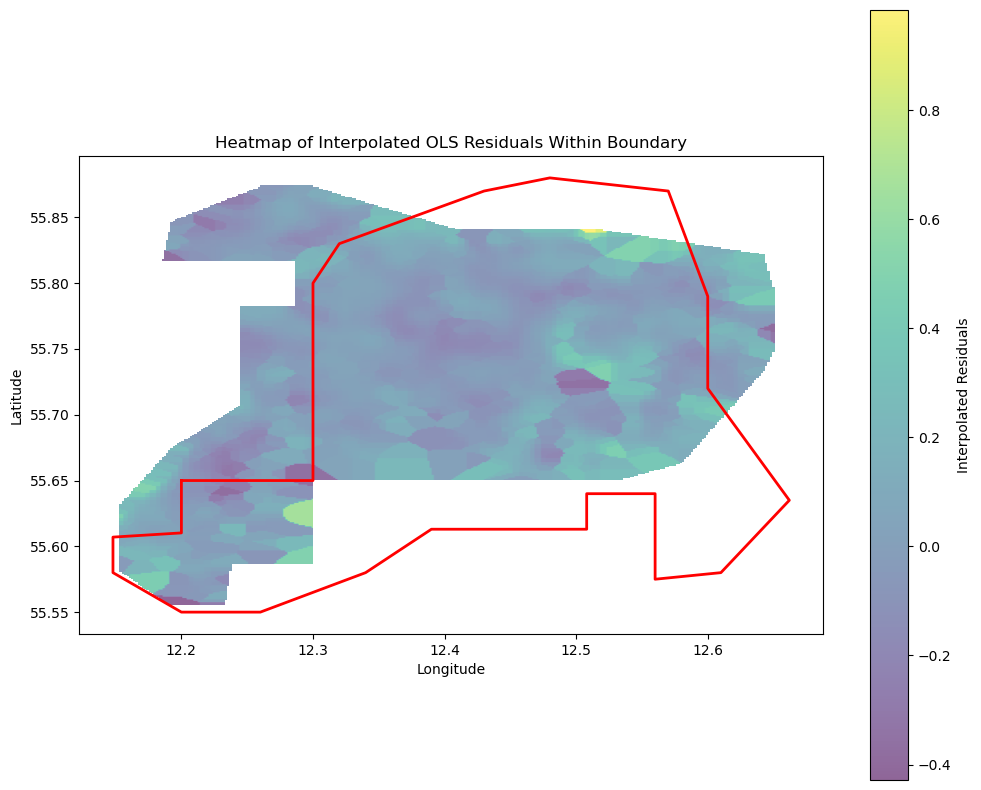

In [101]:
# Assuming interpolated_nearest is your array with interpolated data

# First, let's confirm the shape of your grids
print(fine_grid_x.shape)
print(fine_grid_y.shape)

# Ensure the interpolated data is in the correct shape, matching fine_grid_x and fine_grid_y
print(interpolated_nearest.shape)

# Now plot the results with the corrected orientation
plt.figure(figsize=(12, 10))
plt.imshow(interpolated_nearest, origin='lower', aspect='equal',
           extent=(fine_grid_x.min(), fine_grid_x.max(), fine_grid_y.min(), fine_grid_y.max()),
           cmap='viridis', alpha=0.6)
plt.colorbar(label='Interpolated Residuals')
plt.title('Heatmap of Interpolated OLS Residuals Within Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Overlay the boundary with the correct coordinates
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)

plt.show()


Shape of boundary_coords: (3, 2)


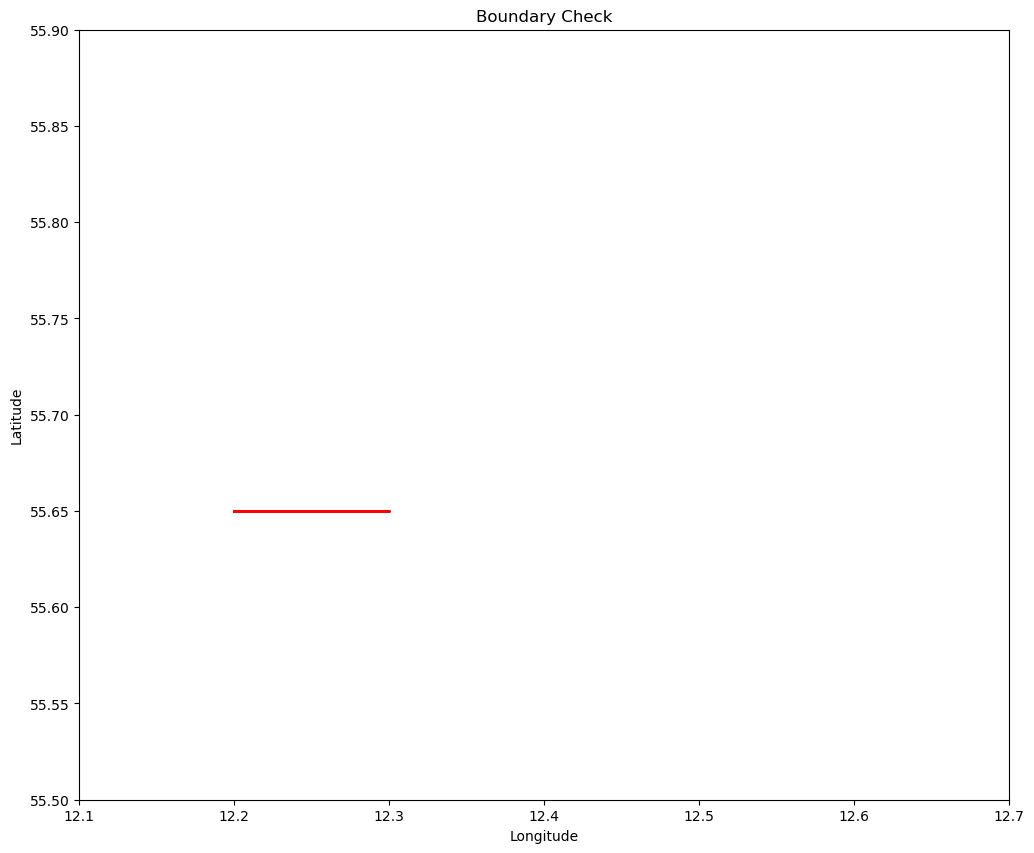

In [102]:
# Make sure boundary_coords is a numpy array with two columns for longitude and latitude
boundary_coords = np.array([
    [12.2, 55.65],
    [12.3, 55.65],
    # ... more coordinates
    [12.2, 55.65]  # Closing the loop
])

# Verify the shape of the array
print("Shape of boundary_coords:", boundary_coords.shape)

# Now plot the boundary
plt.figure(figsize=(12, 10))
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)

# Set the axes limits
plt.xlim(12.1, 12.7)
plt.ylim(55.5, 55.9)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Boundary Check')
plt.show()


Extent values: (12.1, 12.7, 55.5, 55.9)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

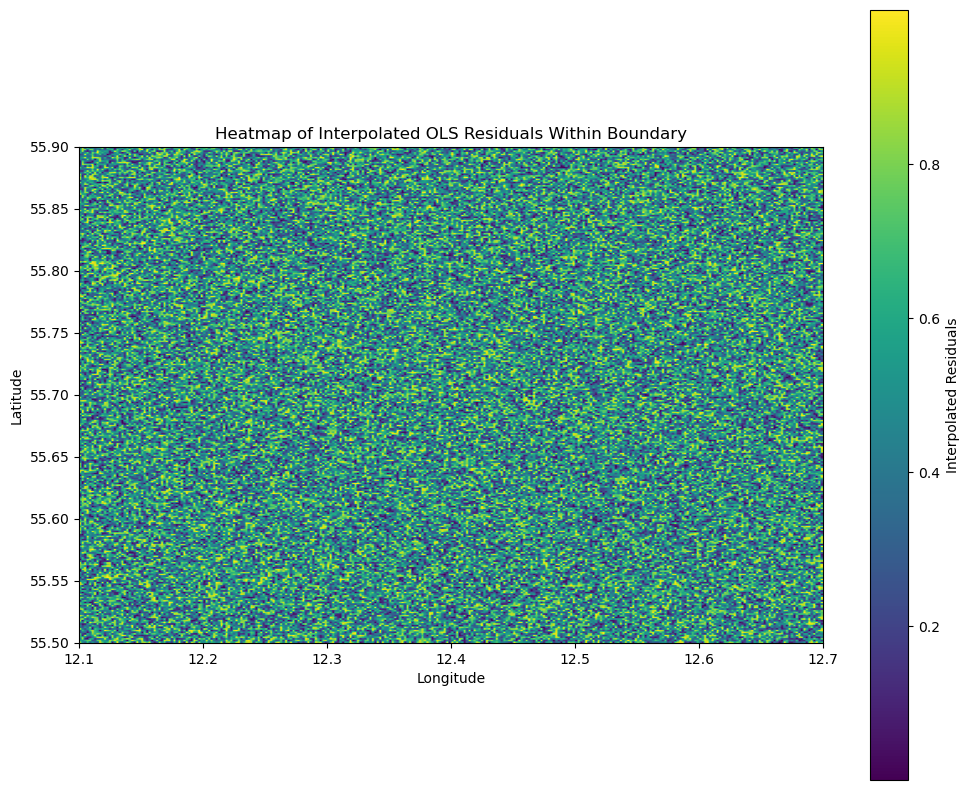

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for aggregated_residuals and their interpolation
lon = np.linspace(12.1, 12.7, 300)
lat = np.linspace(55.5, 55.9, 300)
fine_grid_x, fine_grid_y = np.meshgrid(lon, lat)
interpolated_nearest = np.random.rand(300, 300)  # Replace with your actual data

# Define your boundary coordinates
boundary_coords = np.array([
    # ... your coordinates here
])

# Check the extent values
extent_values = (fine_grid_x.min(), fine_grid_x.max(), fine_grid_y.min(), fine_grid_y.max())
print("Extent values:", extent_values)

# Plot the heatmap with extent to check if it aligns properly
plt.figure(figsize=(12, 10))
plt.imshow(interpolated_nearest, origin='lower', aspect='equal', 
           extent=extent_values, cmap='viridis')
plt.colorbar(label='Interpolated Residuals')
plt.title('Heatmap of Interpolated OLS Residuals Within Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Corrected line for plotting the boundary coordinates
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)


plt.show()
